# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [1]:
# Code Here
from palmerpenguins import load_penguins
penguins = load_penguins()
penguins
# We would need to dummify the categorical variables which is species, siland, and sex

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [4]:
# Code Here
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,  mean_squared_error

penguins_dumb = pd.get_dummies(penguins)
penguins_dumb = penguins_dumb.dropna()

penguins_dumb['sqred'] = penguins_dumb['bill_length_mm']**2
penguins_dumb['cubed'] = penguins_dumb['bill_length_mm']**3
penguins_dumb['4th'] = penguins_dumb['bill_length_mm']**4
penguins_dumb['5th'] = penguins_dumb['bill_length_mm']**5
penguins_dumb['6th'] = penguins_dumb['bill_length_mm']**6
penguins_dumb['7th'] = penguins_dumb['bill_length_mm']**7
penguins_dumb['8th'] = penguins_dumb['bill_length_mm']**8
penguins_dumb['9th'] = penguins_dumb['bill_length_mm']**9
penguins_dumb['10th'] = penguins_dumb['bill_length_mm']**10

X_base = penguins_dumb[['bill_length_mm']]
y = penguins_dumb['bill_depth_mm']

# One split for everyone
X_train_idx, X_test_idx = train_test_split(
    penguins_dumb.index, test_size=0.2, random_state=42
)

# Build each feature matrix using the same rows
X_train_lin = penguins_dumb.loc[X_train_idx, ['bill_length_mm']]
X_test_lin  = penguins_dumb.loc[X_test_idx,  ['bill_length_mm']]

X_train_sq = penguins_dumb.loc[X_train_idx, ['bill_length_mm','sqred']]
X_test_sq  = penguins_dumb.loc[X_test_idx,  ['bill_length_mm','sqred']]

X_train_cu = penguins_dumb.loc[X_train_idx, ['bill_length_mm','sqred','cubed']]
X_test_cu  = penguins_dumb.loc[X_test_idx,  ['bill_length_mm','sqred','cubed']]

X_train_10 = penguins_dumb.loc[X_train_idx, ['bill_length_mm','sqred','cubed','4th','5th','6th','7th','8th','9th','10th']]
X_test_10  = penguins_dumb.loc[X_test_idx,  ['bill_length_mm','sqred','cubed','4th','5th','6th','7th','8th','9th','10th']]

y_train = y.loc[X_train_idx]
y_test  = y.loc[X_test_idx]


lin = LinearRegression().fit(X_train_lin, y_train)
sq  = LinearRegression().fit(X_train_sq,  y_train)
cu  = LinearRegression().fit(X_train_cu,  y_train)
d10 = LinearRegression().fit(X_train_10,  y_train)


yhat_lin = lin.predict(X_test_lin)
yhat_sq  = sq.predict(X_test_sq)
yhat_cu  = cu.predict(X_test_cu)
yhat_10  = d10.predict(X_test_10)

print("R² (Linear):   ", r2_score(y_test, yhat_lin))
print("MSE (Linear):  ", mean_squared_error(y_test, yhat_lin))

print("R² (Quadratic):", r2_score(y_test, yhat_sq))
print("MSE (Quadratic):", mean_squared_error(y_test, yhat_sq))

print("R² (Cubic):    ", r2_score(y_test, yhat_cu))
print("MSE (Cubic):   ", mean_squared_error(y_test, yhat_cu))

print("R² (10th):     ", r2_score(y_test, yhat_10))
print("MSE (10th):    ", mean_squared_error(y_test, yhat_10))


R² (Linear):    0.061663009408228664
MSE (Linear):   3.8955865269774774
R² (Quadratic): 0.09397507566896901
MSE (Quadratic): 3.7614402114786505
R² (Cubic):     0.1220242922038991
MSE (Cubic):    3.644991482374583
R² (10th):      0.19623747807821101
MSE (10th):     3.336889073629385


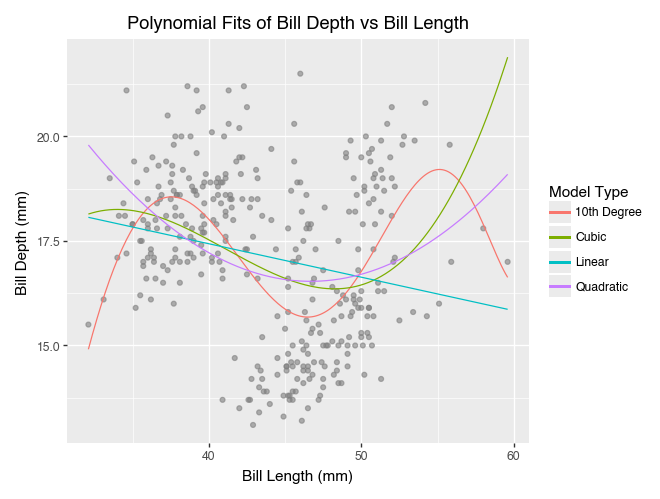

In [6]:
from plotnine import ggplot, aes, geom_point, geom_line, labs
import numpy as np
import pandas as pd

# Smooth x grid
x_vals = np.linspace(penguins_dumb['bill_length_mm'].min(),
                     penguins_dumb['bill_length_mm'].max(), 200)

pieces = []

# --- Linear model ---
Xg_lin = pd.DataFrame({'bill_length_mm': x_vals})
pieces.append(pd.DataFrame({
    'bill_length_mm': x_vals,
    'pred': lin.predict(Xg_lin),
    'Model': 'Linear'
}))

# --- Quadratic model ---
Xg_sq = pd.DataFrame({'bill_length_mm': x_vals})
Xg_sq['sqred'] = Xg_sq['bill_length_mm']**2
pieces.append(pd.DataFrame({
    'bill_length_mm': x_vals,
    'pred': sq.predict(Xg_sq),
    'Model': 'Quadratic'
}))

# --- Cubic model ---
Xg_cu = pd.DataFrame({'bill_length_mm': x_vals})
Xg_cu['sqred'] = Xg_cu['bill_length_mm']**2
Xg_cu['cubed'] = Xg_cu['bill_length_mm']**3
pieces.append(pd.DataFrame({
    'bill_length_mm': x_vals,
    'pred': cu.predict(Xg_cu),
    'Model': 'Cubic'
}))

# --- 10th-degree model ---
Xg_10 = pd.DataFrame({'bill_length_mm': x_vals})
Xg_10['sqred'] = Xg_10['bill_length_mm']**2
Xg_10['cubed'] = Xg_10['bill_length_mm']**3
for k in range(4, 11):
    Xg_10[f'{k}th'] = Xg_10['bill_length_mm']**k

pieces.append(pd.DataFrame({
    'bill_length_mm': x_vals,
    'pred': d10.predict(Xg_10),
    'Model': '10th Degree'
}))

# Combine all model predictions
line_df = pd.concat(pieces, ignore_index=True)

# --- Scatter + fitted lines ---
(
    ggplot(penguins_dumb, aes('bill_length_mm', 'bill_depth_mm'))
    + geom_point(alpha=0.6, color='gray')
    + geom_line(aes('bill_length_mm', 'pred', color='Model'), data=line_df)
    + labs(
        title='Polynomial Fits of Bill Depth vs Bill Length',
        x='Bill Length (mm)',
        y='Bill Depth (mm)',
        color='Model Type'
    )
)


* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

I think that the linear model is clearly underfitting the data. I can tell becuase the dirstibution of the data is clearly not linear it has some shape to it

I think the the model to the tenth power is definitely overfitting because its reacting to the concentration of the data too much. Where we see clumps of data we see the model bend towards this concentration

I think its probably the cubic model. Its hard to tell however as these bill length and depth dont seem very correlated.